In [1]:
pip install kagglehub


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jonathanoheix/face-expression-recognition-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/face-expression-recognition-dataset


In [3]:
pip install keras_preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.8 MB/s eta 0:00:00


In [4]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [5]:
TRAIN_DIR = '/kaggle/input/face-expression-recognition-dataset/images/images/train'
TEST_DIR = '/kaggle/input/face-expression-recognition-dataset/images/images/validation'

In [6]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [7]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

surprise completed
fear completed
angry completed
neutral completed
sad completed
disgust completed
happy completed


In [8]:
print(train)

                                                   image     label
0      /kaggle/input/face-expression-recognition-data...  surprise
1      /kaggle/input/face-expression-recognition-data...  surprise
2      /kaggle/input/face-expression-recognition-data...  surprise
3      /kaggle/input/face-expression-recognition-data...  surprise
4      /kaggle/input/face-expression-recognition-data...  surprise
...                                                  ...       ...
28816  /kaggle/input/face-expression-recognition-data...     happy
28817  /kaggle/input/face-expression-recognition-data...     happy
28818  /kaggle/input/face-expression-recognition-data...     happy
28819  /kaggle/input/face-expression-recognition-data...     happy
28820  /kaggle/input/face-expression-recognition-data...     happy

[28821 rows x 2 columns]


In [9]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

surprise completed
fear completed
angry completed
neutral completed
sad completed
disgust completed
happy completed


In [10]:
print(test)
print(test['image'])

                                                  image     label
0     /kaggle/input/face-expression-recognition-data...  surprise
1     /kaggle/input/face-expression-recognition-data...  surprise
2     /kaggle/input/face-expression-recognition-data...  surprise
3     /kaggle/input/face-expression-recognition-data...  surprise
4     /kaggle/input/face-expression-recognition-data...  surprise
...                                                 ...       ...
7061  /kaggle/input/face-expression-recognition-data...     happy
7062  /kaggle/input/face-expression-recognition-data...     happy
7063  /kaggle/input/face-expression-recognition-data...     happy
7064  /kaggle/input/face-expression-recognition-data...     happy
7065  /kaggle/input/face-expression-recognition-data...     happy

[7066 rows x 2 columns]
0       /kaggle/input/face-expression-recognition-data...
1       /kaggle/input/face-expression-recognition-data...
2       /kaggle/input/face-expression-recognition-data...
3       /

In [11]:
from tqdm.notebook import tqdm

In [12]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [13]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [14]:
test_features = extract_features(test['image'])


  0%|          | 0/7066 [00:00<?, ?it/s]

In [15]:
x_train = train_features/255.0
x_test = test_features/255.0

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [18]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [19]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [20]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input

model = Sequential()
model.add(Input(shape=(48, 48, 1)))  # <- Explicit input layer

# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

# fully connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# output
model.add(Dense(7, activation='softmax'))


In [22]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [23]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test))

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 35s 95ms/step - accuracy: 0.2333 - loss: 1.8416 - val_accuracy: 0.2588 - val_loss: 1.8058
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.2522 - loss: 1.8017 - val_accuracy: 0.2922 - val_loss: 1.7211
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.2921 - loss: 1.7157 - val_accuracy: 0.3776 - val_loss: 1.5588
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.3738 - loss: 1.5858 - val_accuracy: 0.4445 - val_loss: 1.4125
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.4259 - loss: 1.4734 - val_accuracy: 0.4713 - val_loss: 1.3643
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.4568 - loss: 1.4183 - val_accuracy: 0.4946 - val_loss: 1.3231
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.4745 - loss: 1.3697 - val_accuracy: 0.5184 - val_loss: 1.2538
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.4845 - loss: 1

In [24]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [25]:
from keras.models import model_from_json

In [27]:
# In cell ipython-input-26-62a874220eb2, change the filename to "emotiondetector.json":
json_file = open("emotiondetector.json", "r") # Changed the file name to match the saved file
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)

# Similarly, change the filename for loading weights to "emotiondetector.h5":
model.load_weights("emotiondetector.h5") # Changed the file name to match the saved file

In [28]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [29]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0


In [30]:
image = '/kaggle/input/face-expression-recognition-dataset/images/images/train/sad/1001.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad


/usr/local/lib/python3.11/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
model prediction is  sad


In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
model prediction is  sad


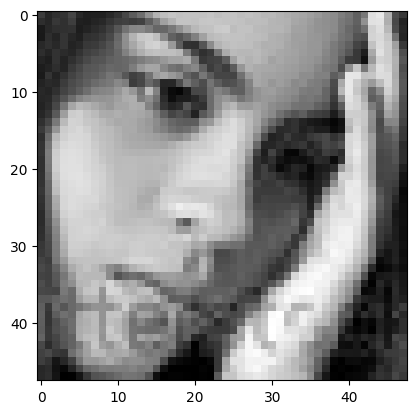

In [35]:
image = '/kaggle/input/face-expression-recognition-dataset/images/images/train/sad/1001.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')